## Disposition


- Brug af pandas til tabeldata - fortsat
- Variabeltransformation
- Introduktion til simple modelleringer i python


- Pandas genopfriskning
    - Inspicering
    - Subsetting
    - Rekodning
    - Nye variable
- Håndtering af kategoriske variable
- Simpel håndtering a missing (`dropna()`, `fillna()`) - `fillna()`methods: forwardfill: `ffill`, backwardfill: `bfill` - akse 0,1 alt efter række, koloone
- append (`.concat`) og merge (`.merge`) 
    - join (`join = `)
    - `on`, `left_on`, `right_on`
    - `how`, `outer`, `inner`, `left`, `right`
- `.groupby` (pyDSH, s.162)
- strings (pyDSH, s. 180-182)
- dummy-konvertering


Kenneth Stanford?


https://www.datacamp.com/community/tutorials/categorical-data
https://pbpython.com/categorical-encoding.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

# Python til tabeldata

## Dagens workshop

I dag arbejder vi videre med, hvordan python bruges til tabeldata. Vi skal blandt andet igennem, hvordan python bruges til simpel statistik og modeller, samt hvordan vi løser forskellige datahåndteringsproblemer.

### Program
- Genopfriskning fra del 1
- Lineær regression med `scikit-learn`
- Plots med `seaborn`
- Håndtering af kategoriske data
- Håndtering af missing
- Kombinering af data

## Genopfriskning fra del 1

In [145]:
#Indlæs data
import pandas as pd
ess = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-intro/raw/master/data/ESS2014DK_subset.csv')

In [146]:
#Inspicer første 5 rækker af pandas dataframe
ess.head()

,idno,ppltrst,happy,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921018,6,9,10.0,2-3 times a month,178.0,64.0,Male,1990.0
1,921026,8,8,NaN,Several times a week,172.0,64.0,Female,1948.0
2,921034,8,8,NaN,Every day,176.0,87.0,Male,1957.0
3,921076,8,8,NaN,Several times a week,162.0,70.0,Female,1958.0
4,921084,5,8,NaN,Every day,175.0,80.0,Male,1936.0


In [149]:
#Kolonner kan referes til ved navn (returnerer som en pandas serie)
ess['cgtsday'].head()

0    10.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: cgtsday, dtype: float64

In [151]:
#Vi kan inspicere typen med .dtypes (float64 = decimaltal)
ess['cgtsday'].dtypes

dtype('float64')

In [163]:
#Dele af data kan specificeres med .loc (rækker, kolonner)
ess.loc[10:15, 'cgtsday'] #Returneres som serie

10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15    10.0
Name: cgtsday, dtype: float64

In [158]:
#Flere kolonner specificeres ved at sætte dem ind i liste
ess.loc[10:15, ['happy', 'cgtsday']] #Returneres som data frame

,happy,cgtsday
10,8,NaN
11,4,NaN
12,8,NaN
13,8,NaN
14,9,NaN
15,Extremely happy,10.0


In [165]:
#Bestemte rækker specificeres ved at sætte kriterie(r)
ess.loc[ess['cgtsday'] == 10, ['cgtsday','happy']].head() #Returneres som data frame

,cgtsday,happy
0,10.0,9
15,10.0,Extremely happy
39,10.0,Extremely happy
49,10.0,4
121,10.0,9


In [166]:
#Nye variable dannes ved at referere til variabel/kolonne, som endnu ikke er i datasætttet
ess['bmi'] = ess['weight'] * (ess['height']/100)**2

## ØVELSE 0: Opvarmning

1. Indlæs ESS datasættet fra sidste gang 

    `pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-intro/raw/master/data/ESS2014DK_subset.csv')`
    
    
2. Lav en aldersvariabel (datasættet er fra 2014)

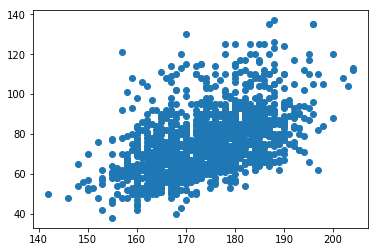

In [173]:
%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt

#sns.set()
#sns.lineplot(ess['height'], ess['weight'])

plt.scatter(ess['height'], ess['weight'])

## Modeller/estimater i python

Typisk arbejder vi i samfundsvidenskab med statistisker modeller til at producere estimater: Hvor meget bliver Y påvirket af X, og hvor sikre er vi på det estimat?

I Neighborhood AI beskæftiger os vi med machine learning, hvor nogen af de samme modeller, som I kender fra statistik også bliver brugt. Her er det dog anderledes, da vi ikke beskæftiger os med, hvor godt et estimat, X, kan forklare Y, men i stedet er interesseret i, hvor godt vi kan forudsige Y. 

Vi skifter altså fokus væk fra forklaringskraften af et enkelte estimater til at fokusere på hvor mange estimater, der skal til for at kunne forudsige Y.


I denne workshop arbejder vi med scikit learn, som er et pakkebibliotek udviklet specifikt til machine learning. 

Måden man specificerer og bruger modeller (fx lineær regression) er derfor anderledes, da man netop har dette andet sigte.

**Lineær regression i python med scikit learn**
- Specificer modellen: `model = LinearRegression`
- Specificer X og Y: `X = pd.DataFrame(ess['height']), Y = ess['weight']`
- Fit modellen: `model.fit(X, Y)`
- Print ønskede outputs: `print(model.coef_, model.score(X, Y)`

## [simple eksempler med IRIS]

In [180]:
from sklearn.linear_model import LinearRegression

In [177]:
#data

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

In [144]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
ess_nona = ess.dropna()
X = ess_nona['height'].to_frame()
Y = ess_nona['weight']

In [162]:
model.fit(X, Y)
print(model.coef_[0],
     model.intercept_)

0.919537435868 -84.9554253088


In [140]:
model.score(X, Y)

0.28011301710998426

## [øvelse med IRIS]

## [forsøg med ESS - duer ikke - hvorfor?]

## [missing data - fix]

## [øvelse: fix og kør igen]

## [forsøg med ESS på kategorisk data - duer ikke - hvorfor?]

## [kategorisk data i python]

## [øvelse: fix kategorisk og kør igen]

## [dan kategoriske variable og brug af crosstab]

## [øvelse: kategorisk variabel med brug af cut + crosstab]

## [tilføj data - hvordan?]

## [øvelse: tilføj data, fix kategorisk variabel, omdan kategorisk variabel til dummier, kør model]

In [4]:
money = pd.Series({'Lars': 30000, 'Mads': 40000, 'Kim':35000})
age = pd.Series({'Lars': 23, 'Mads': 30, 'Kim': 37})
data = pd.DataFrame({'money': money, 'age': age})

In [11]:
data.stack()

Lars  money    30000
      age         23
Mads  money    40000
      age         30
Kim   money    35000
      age         37
dtype: int64

In [9]:
data.iloc[1]

money    40000
age         30
Name: Mads, dtype: int64

In [141]:
cats = pd.Series(["big cat", "small cat", "medium cat", "stupid cat"])

In [143]:
cats.str.get_dummies()
#cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

,big cat,medium cat,small cat,stupid cat
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1


In [32]:
ess = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-intro/raw/master/data/ESS2014DK_subset.csv')

In [33]:
ess.head()

,idno,ppltrst,happy,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921018,6,9,10.0,2-3 times a month,178.0,64.0,Male,1990.0
1,921026,8,8,NaN,Several times a week,172.0,64.0,Female,1948.0
2,921034,8,8,NaN,Every day,176.0,87.0,Male,1957.0
3,921076,8,8,NaN,Several times a week,162.0,70.0,Female,1958.0
4,921084,5,8,NaN,Every day,175.0,80.0,Male,1936.0


In [34]:
ess.dtypes

idno         int64
ppltrst     object
happy       object
cgtsday    float64
alcfreq     object
height     float64
weight     float64
gndr        object
yrbrn      float64
dtype: object

In [35]:
ess['happy'] = ess['happy'].astype("category")
ess['happy'].value_counts()

8                    457
9                    446
Extremely happy      278
7                    170
6                     57
5                     43
3                     16
4                     12
2                     11
1                      5
Extremely unhappy      1
Name: happy, dtype: int64

In [47]:
ess['happy'].describe()

count     1496
unique      11
top          8
freq       457
Name: happy, dtype: object

In [59]:
ess['happy'].cat.categories

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Extremely happy',
       'Extremely unhappy'],
      dtype='object')

In [61]:
ess['happy'].cat.codes.unique()

array([ 8,  7,  9,  3,  5,  6,  2,  4,  0,  1, -1, 10])

In [66]:
ess['happy_codes'] = ess['happy'].cat.codes
ess.loc[ess['happy'] == "Extremely unhappy", ['happy', 'happy_codes']]

,happy,happy_codes
1091,Extremely unhappy,10


In [80]:
replace_map = {'happy': {'Extremely unhappy': 0, 'Extremely happy': 10}}
replace_map2 = {'Extremely unhappy': 0, 'Extremely happy': 10}
ess['happy_num'] = ess['happy'].replace(replace_map2)
ess.head()

,idno,ppltrst,happy,cgtsday,alcfreq,height,weight,gndr,yrbrn,happy_new,happy_codes,happy_num
0,921018,6,9,10.0,2-3 times a month,178.0,64.0,Male,1990.0,NaN,8,9
1,921026,8,8,NaN,Several times a week,172.0,64.0,Female,1948.0,NaN,7,8
2,921034,8,8,NaN,Every day,176.0,87.0,Male,1957.0,NaN,7,8
3,921076,8,8,NaN,Several times a week,162.0,70.0,Female,1958.0,NaN,7,8
4,921084,5,8,NaN,Every day,175.0,80.0,Male,1936.0,NaN,7,8


In [71]:
pd.crosstab(ess['happy'])

TypeError: crosstab() missing 1 required positional argument: 'index'

In [52]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

9    11
1     5
Name: happy_new, dtype: int64

In [39]:
#omskriv til øvelse med alder
df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)

NameError: name 'df' is not defined